In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [55]:
data = pd.read_csv('data_cleaning.csv')

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


<AxesSubplot:xlabel='Dependents', ylabel='count'>

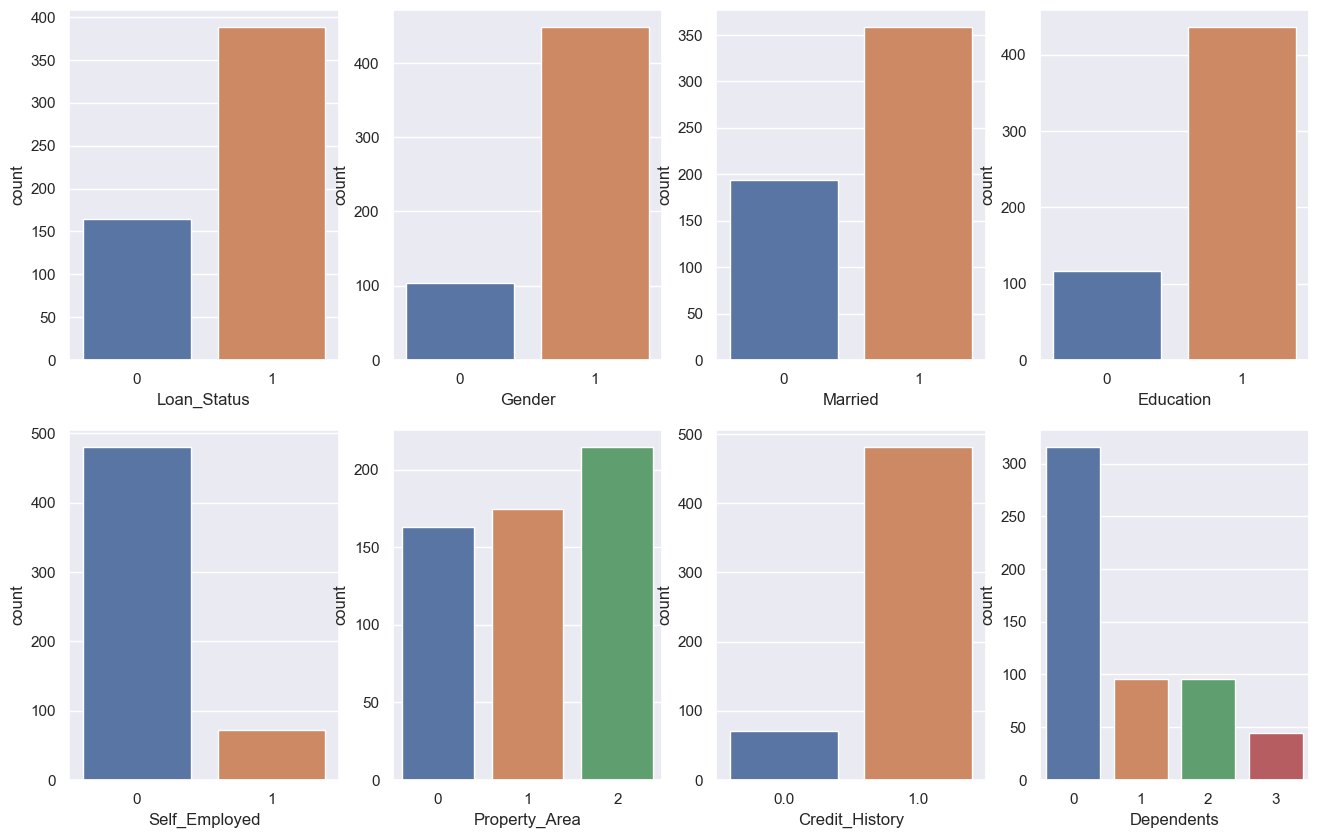

In [57]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = data, ax=ax[0][0])
sns.countplot(x='Gender', data = data, ax=ax[0][1])
sns.countplot(x='Married', data = data, ax=ax[0][2])
sns.countplot(x='Education', data = data, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = data, ax=ax[1][0])
sns.countplot(x='Property_Area', data = data, ax=ax[1][1])
sns.countplot(x='Credit_History', data = data, ax=ax[1][2])
sns.countplot(x='Dependents', data = data, ax=ax[1][3])

Univariate Analysis Observations:

1. More Loans are approved Vs Rejected
2. Count of Male applicants is more than Female
3. Count of Married applicant is more than Non-married
4. Count of graduate is more than non-Graduate
5. Count of self-employed is less than that of Non-Self-employed
6. Maximum properties are located in Semiurban areas
7. Credit History is present for many applicants
8. The count of applicants with several dependents=0 is maximum.

In [58]:
real_data = pd.read_csv('cleaned_data.csv')
real_data.drop('Unnamed: 0', axis=1, inplace=True)

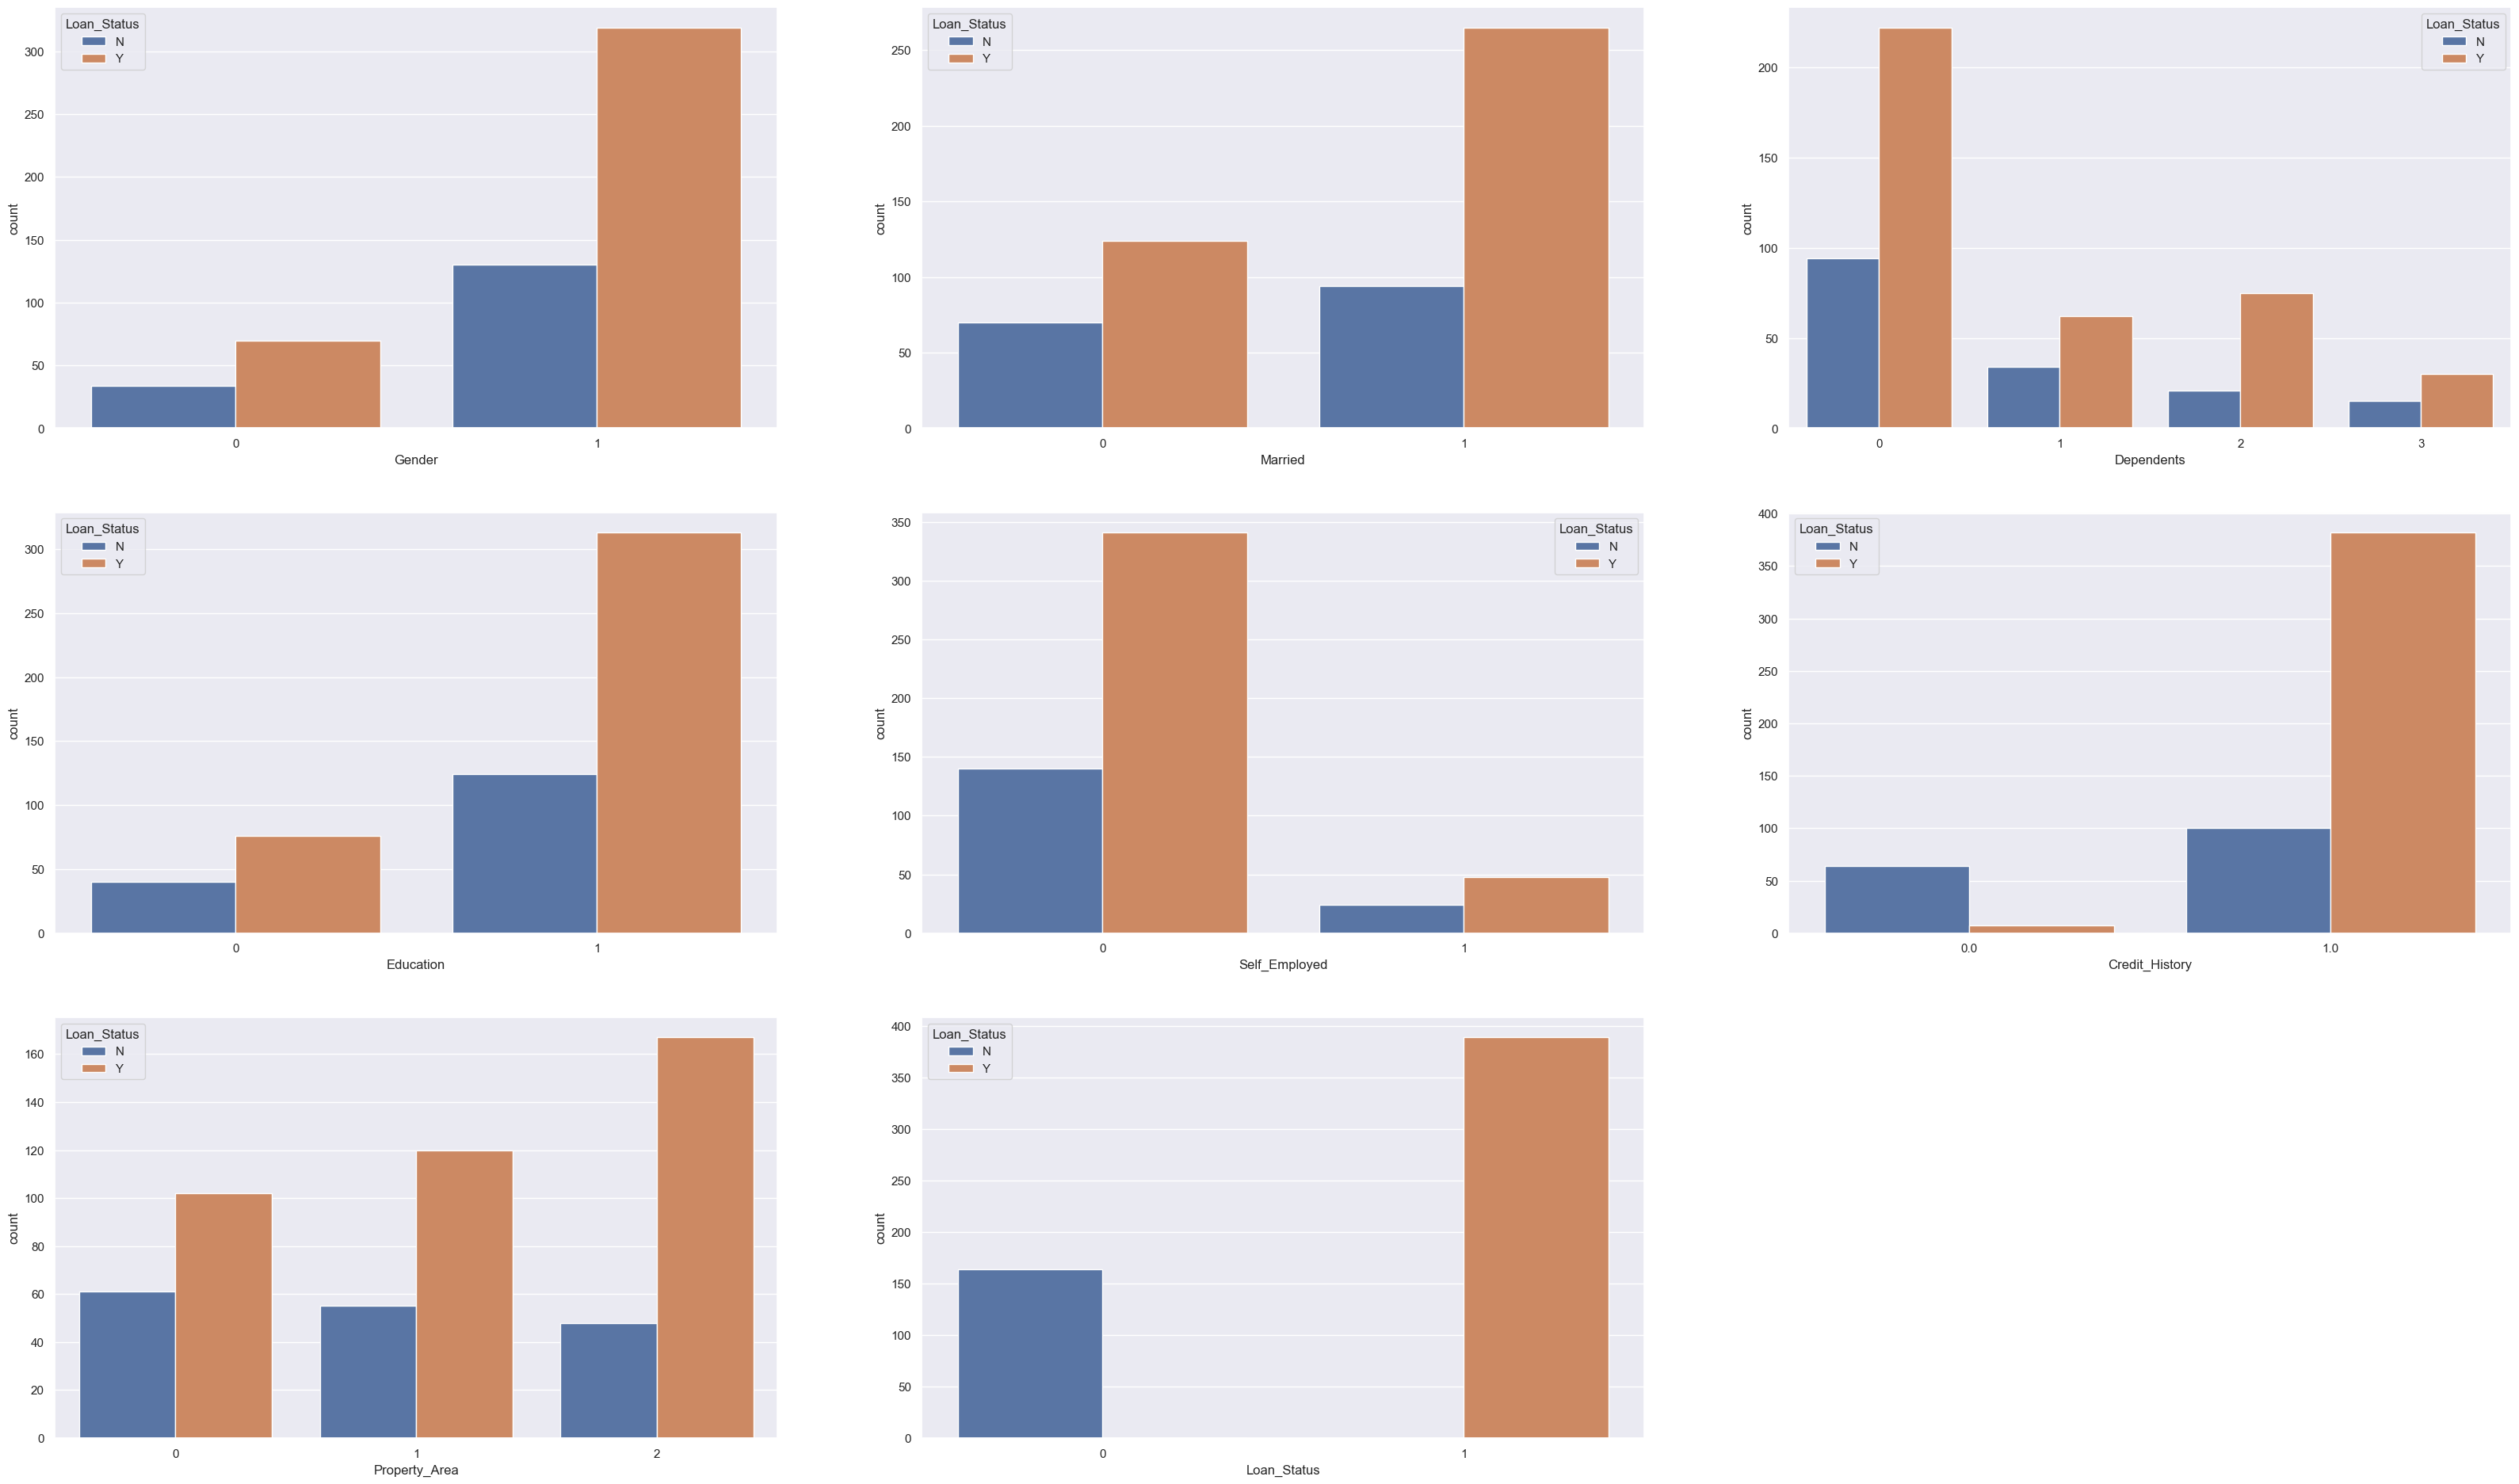

In [59]:
#Visualising features with low unique values for better understanding
v= real_data[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area' \
          ,'Loan_Status']].columns
plt.figure(figsize=(40,40))
for i,col in enumerate(v):
    plt.subplot(5,3,i+1)
    sns.set(style='darkgrid')
    sns.countplot(x=data[col],hue=real_data['Loan_Status'])
plt.show()

1. mens are getting more lone than womens. where 0 is womens and 1 is male
2. married peopele are getting more lone then unmarried people. where 0 is married and 1 is unmarried
3. Educated people are getting more lone that uneducated peopele. 0 is uneducated and 1 is educated
4. self employeed get less then non self employeed. 0 is non self employeed and 1 is self employeed
5. who belongs to semi urban property, those people get more lone then rural and urban area. 0 is rural 1 is urban and 2 is semi urban

In [60]:
# Filter categorical variables
categorical_columns = [x for x in real_data.dtypes.index if real_data.dtypes[x] == 'object']
# Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s' % col)
    print(real_data[col].value_counts())


Frequency of Categories for variable Gender
Gender
Male      449
Female    104
Name: count, dtype: int64

Frequency of Categories for variable Married
Married
Yes    359
No     194
Name: count, dtype: int64

Frequency of Categories for variable Education
Education
Graduate        437
Not Graduate    116
Name: count, dtype: int64

Frequency of Categories for variable Self_Employed
Self_Employed
No     481
Yes     72
Name: count, dtype: int64

Frequency of Categories for variable Property_Area
Property_Area
Semiurban    215
Urban        175
Rural        163
Name: count, dtype: int64

Frequency of Categories for variable Loan_Status
Loan_Status
Y    389
N    164
Name: count, dtype: int64


<AxesSubplot:>

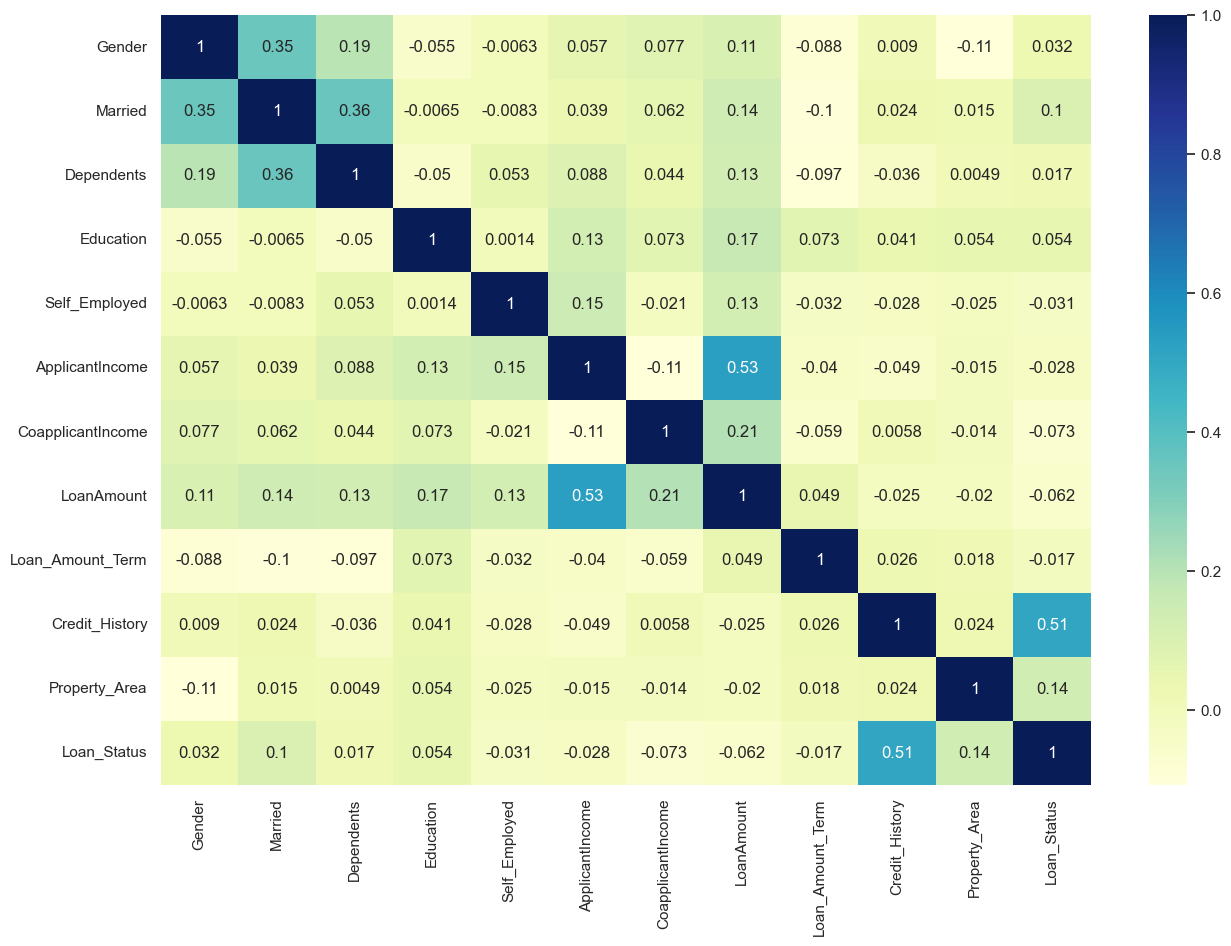

In [61]:
numeric_columns = data.select_dtypes(include=['number'])  # Select numeric columns
corr = numeric_columns.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

1. There's a positive relationship between applicant income & loan amount.
2. There's also a positive relationship between credit history and loan status.
3. On average, men got more loans. Being married & educated (graduate) were also factors that resulted in loan approvals.

#### Boxplots for relation between Property area, amount of Loan and Education qualification
The relation between education status,loan taken and property area

###### Property_Area:
1. Urban      :0
2. Semiurban  :1
3. Rural      :2

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

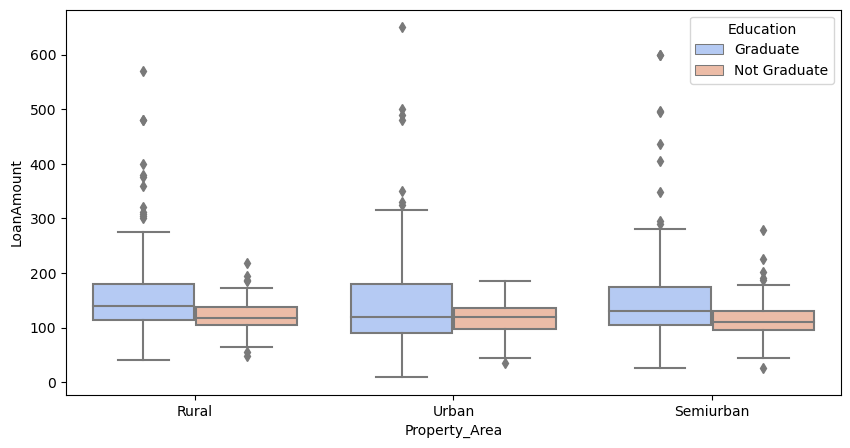

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=real_data, palette="coolwarm")

#### The above boxplot signifies that,
1. In the Urban area the non graduates take slightly more loan than graduates.
2. In the Rural and semiurban area the graduates take more amount of Loan than non graduates
3. The higher values of Loan are mostly from Urban area

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

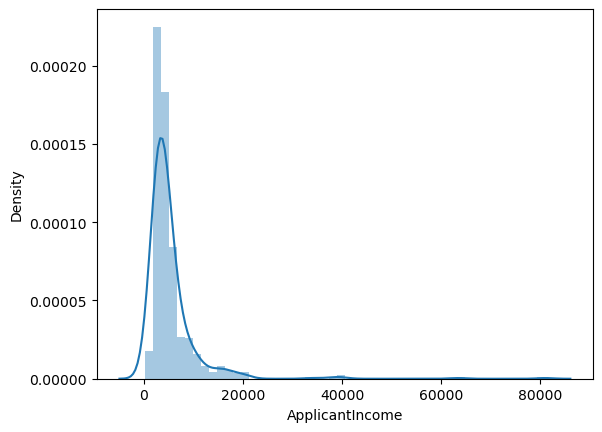

In [39]:
# numerical attributes visualization
sns.distplot(data["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

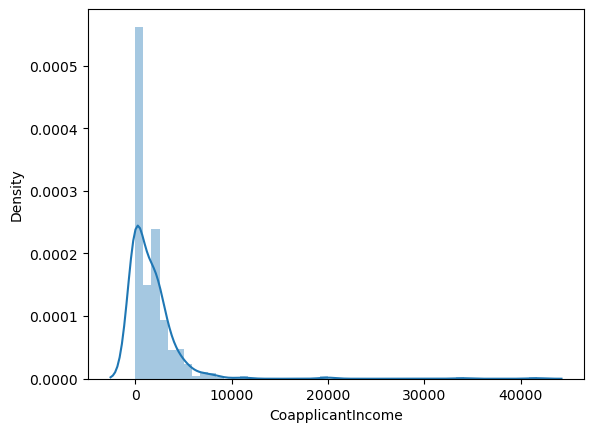

In [40]:
sns.distplot(data["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

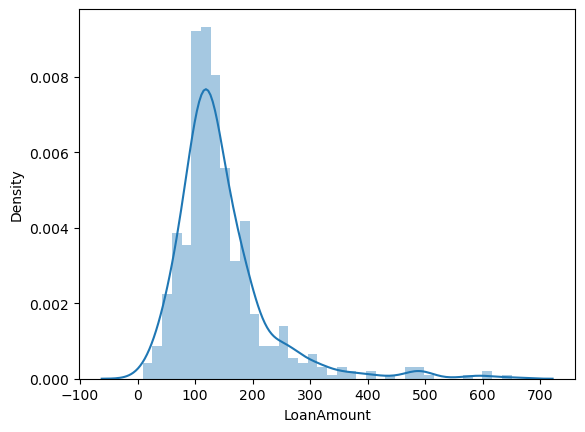

In [41]:
sns.distplot(data["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

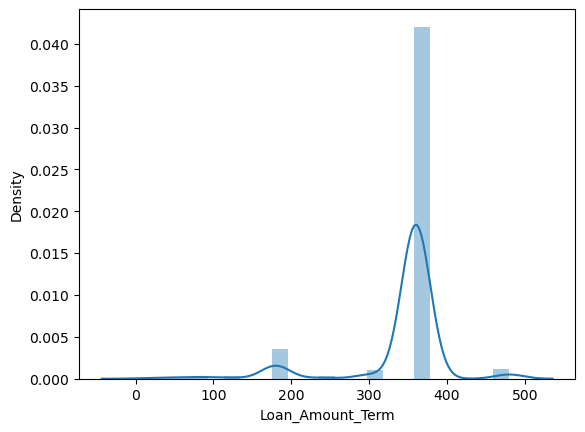

In [42]:
sns.distplot(data['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

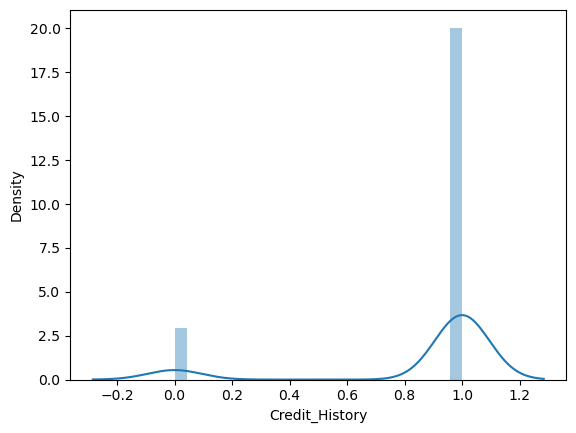

In [43]:
sns.distplot(data['Credit_History'])

In [44]:
# total income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
4,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1,9613.0


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

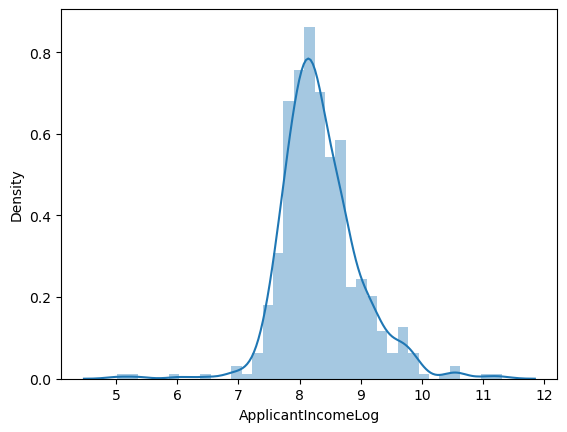

In [45]:
# apply log transformation to the attribute
data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome']+1)
sns.distplot(data["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

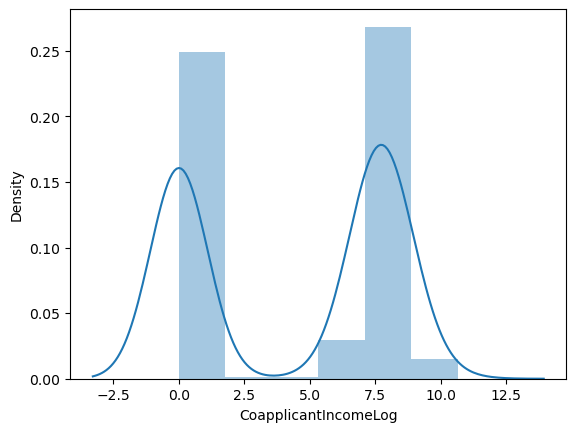

In [46]:
data['CoapplicantIncomeLog'] = np.log(data['CoapplicantIncome']+1)
sns.distplot(data["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

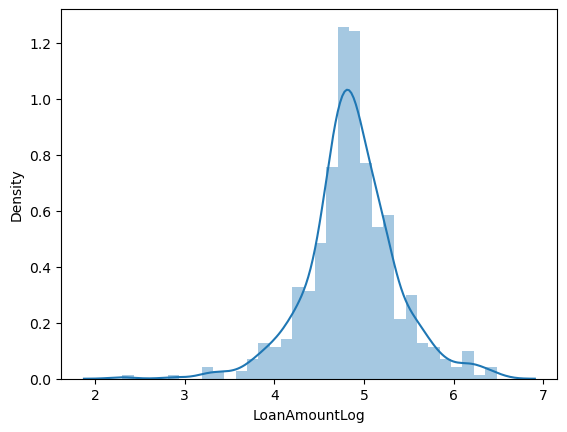

In [47]:
data['LoanAmountLog'] = np.log(data['LoanAmount']+1)
sns.distplot(data["LoanAmountLog"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

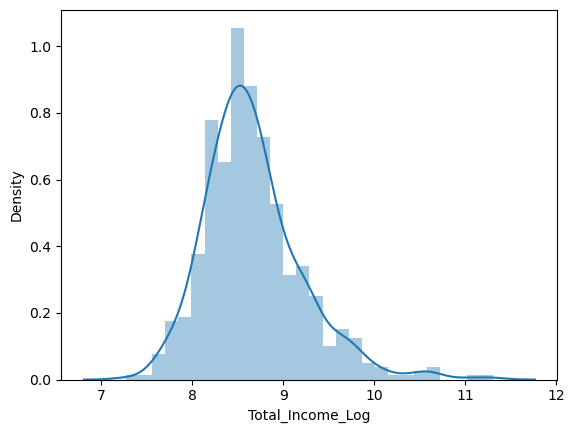

In [48]:
data['Total_Income_Log'] = np.log(data['Total_Income']+1)
sns.distplot(data["Total_Income_Log"])

we have deleted sum of the columns like applicant income and coapplicantincome etc because the applicant income and applicant income log ia highly corelated as per chart because has similar values as i used log for visualization steps to understand the distribution of the logarithmically transformed. Logarithmic transformations are often used when dealing with data that has a wide range of values or when the distribution is skewed. This transformation can help in stabilizing variance, making patterns more apparent, and making the data more amenable.

In [49]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']
df = data.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_Income_Log
0,1,1,1,1,0,1.0,0,0,8.430327,4.859812,8.714732
1,1,1,0,1,1,1.0,1,1,8.006701,4.204693,8.006701
2,1,1,0,0,0,1.0,1,1,7.857094,4.795791,8.505525
3,1,0,0,1,0,1.0,1,1,8.699681,4.955827,8.699681
4,1,1,2,1,1,1.0,1,1,8.597482,5.590987,9.170976


In [25]:
df.to_csv('Feature_engeen.csv')